<a href="https://colab.research.google.com/github/DSPL-Project-Group-B10/Models-/blob/main/DSPL_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Scalling

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
# Scaling gets the values into one range which improves the performance of the models
# Here Min Max scaling gets it into between 1 and 0.

df = pd.read_csv("/content/drive/MyDrive/Colab Data Files/Data Science Project Lifecycle/Project/processed_traincsv.csv")

from sklearn.preprocessing import MinMaxScaler

# Define the scaler
scaler = MinMaxScaler()

# Select the columns to scale
columns_to_scale = ['luxury_sales', 'fresh_sales', 'dry_sales']

# Apply Min-Max Scaling
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Display the scaled DataFrame
df.head()

#Save The Dataset to drive
df.to_csv("/content/drive/MyDrive/Colab Data Files/Data Science Project Lifecycle/Project/processed_traincsv.csv", index=False)


# Model 05

## Random Forest Model

In [ ]:
import pandas as pd
# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Data Files/Data Science Project Lifecycle/Project/processed_traincsv.csv")

In [ ]:
print(df.dtypes)
print(df.info())

Customer_ID             float64
outlet_city               int64
luxury_sales            float64
fresh_sales             float64
dry_sales               float64
cluster_catgeory          int64
outlet_city_original     object
total_sales             float64
luxury_sales_pct        float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774049 entries, 0 to 774048
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Customer_ID           774049 non-null  float64
 1   outlet_city           774049 non-null  int64  
 2   luxury_sales          774049 non-null  float64
 3   fresh_sales           774049 non-null  float64
 4   dry_sales             774049 non-null  float64
 5   cluster_catgeory      774049 non-null  int64  
 6   outlet_city_original  774049 non-null  object 
 7   total_sales           774049 non-null  float64
 8   luxury_sales_pct      774049 non-null  float64
dtypes: float64(

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Define features and target
X = df[['luxury_sales','fresh_sales','dry_sales','outlet_city']]
y = df['cluster_catgeory']

# Split data into training and testing sets (80-20 split)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=25, random_state=42)
rf_model.fit(x_train, y_train)

print("Random Forest model trained successfully!")

Random Forest model trained successfully!


## Useful Visualisations for Random Forest Model

In [ ]:
# @title Evaluation of Random Forest
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the testing set
y_pred = rf_model.predict(x_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Classification Report (precision, recall, f1-score)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Model Accuracy: 99.92%
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     37792
           2       1.00      1.00      1.00     31008
           3       1.00      1.00      1.00      9778
           4       1.00      1.00      1.00     34486
           5       1.00      1.00      1.00      7905
           6       1.00      1.00      1.00     33841

    accuracy                           1.00    154810
   macro avg       1.00      1.00      1.00    154810
weighted avg       1.00      1.00      1.00    154810

Confusion Matrix:
[[37760     1     1    29     0     1]
 [    0 30988     1     1     0    18]
 [    1     0  9775     1     1     0]
 [   15     0     4 34466     1     0]
 [    1     0    16     1  7887     0]
 [    1    24     3     2     1 33810]]


In [ ]:
# Make predictions on the training set
y_train_pred = rf_model.predict(x_train)

# Accuracy on training set
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Classification Report for training set
print("Training Classification Report:")
print(classification_report(y_train, y_train_pred))

# Confusion Matrix for training set
print("Training Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))

Training Accuracy: 1.0000
Training Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00    151169
           2       1.00      1.00      1.00    124032
           3       1.00      1.00      1.00     39112
           4       1.00      1.00      1.00    137941
           5       1.00      1.00      1.00     31620
           6       1.00      1.00      1.00    135365

    accuracy                           1.00    619239
   macro avg       1.00      1.00      1.00    619239
weighted avg       1.00      1.00      1.00    619239

Training Confusion Matrix:
[[151167      0      0      0      0      2]
 [     0 124031      0      0      0      1]
 [     2      0  39110      0      0      0]
 [     0      0      0 137939      1      1]
 [     0      0      2      0  31615      3]
 [     0      0      0      0      1 135364]]


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model using y_test instead of y_val
MSE = mean_squared_error(y_test, y_pred)
r2_ = r2_score(y_test, y_pred)
Acs = accuracy_score(y_test, y_pred)

print(f"MSE: {MSE}")
print(f"R2: {r2_}")
print(f"Accuracy: {Acs}")

MSE: 0.008132549576900718
R2: 0.9976669551562968
Accuracy: 0.9991990181512822


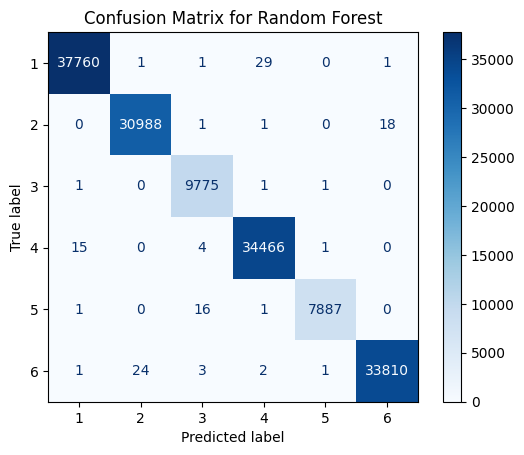

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Use x_test and y_test instead of X_val and y_val
ConfusionMatrixDisplay.from_estimator(rf_model, x_test, y_test, cmap="Blues")
plt.title("Confusion Matrix for Random Forest")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

# Predict values using the trained model
y_pred = rf_model.predict(x_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:\n", cm)

# Extract and print TP, FP, FN, TN for each class
for i in range(len(cm)):
    tp = cm[i, i]
    fp = cm[:, i].sum() - tp
    fn = cm[i, :].sum() - tp
    tn = cm.sum() - (tp + fp + fn)
    print(f"Class {i}: TP={tp}, FP={fp}, FN={fn}, TN={tn}")

Confusion Matrix:
 [[37760     1     1    29     0     1]
 [    0 30988     1     1     0    18]
 [    1     0  9775     1     1     0]
 [   15     0     4 34466     1     0]
 [    1     0    16     1  7887     0]
 [    1    24     3     2     1 33810]]
Class 0: TP=37760, FP=18, FN=32, TN=117000
Class 1: TP=30988, FP=25, FN=20, TN=123777
Class 2: TP=9775, FP=25, FN=3, TN=145007
Class 3: TP=34466, FP=34, FN=20, TN=120290
Class 4: TP=7887, FP=3, FN=18, TN=146902
Class 5: TP=33810, FP=19, FN=31, TN=120950


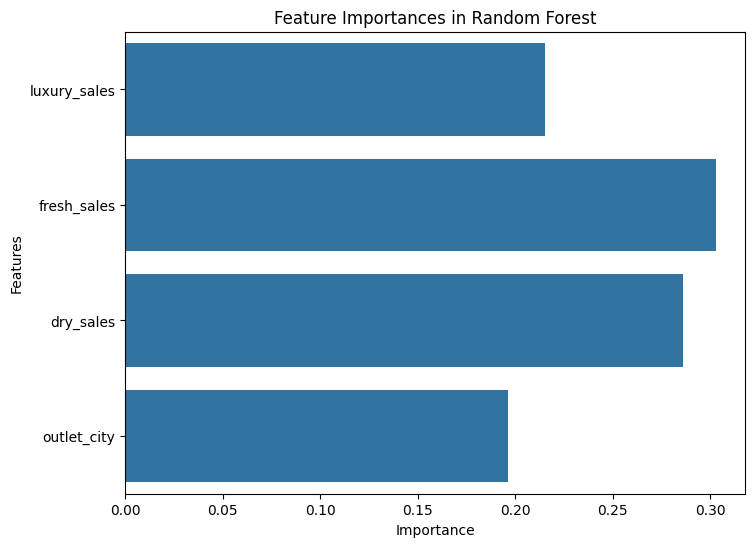

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importance from Random Forest model
importances = rf_model.feature_importances_
#features = x_test.columns  # Use x_test since it has the correct columns

# Get the original feature names from 'X' before scaling
features = X.columns

# Plot feature importance
plt.figure(figsize=(8, 6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importances in Random Forest")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

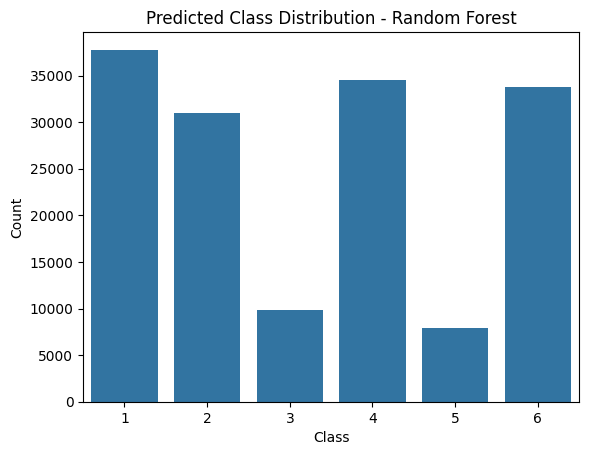

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

y_pred_rf = rf_model.predict(x_test)

# Plot predicted class distribution
sns.countplot(x=y_pred_rf)
plt.title("Predicted Class Distribution - Random Forest")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


In [ ]:
df.head()

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory,outlet_city_original,total_sales,luxury_sales_pct
0,10493832.0,11,0.172099,0.053467,0.354981,4,Kelaniya,7257.60,16.666667
1,10178643.0,13,0.226508,0.075203,0.407956,1,Moratuwa,8657.32,18.367347
2,10513916.0,19,0.326422,0.105293,0.641183,4,Wattala,12925.44,17.708333
3,10334589.0,19,0.324429,0.123779,0.637052,4,Wattala,13114.36,17.346939
4,10458365.0,11,0.334516,0.147360,0.647737,4,Kelaniya,13659.03,17.171717


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


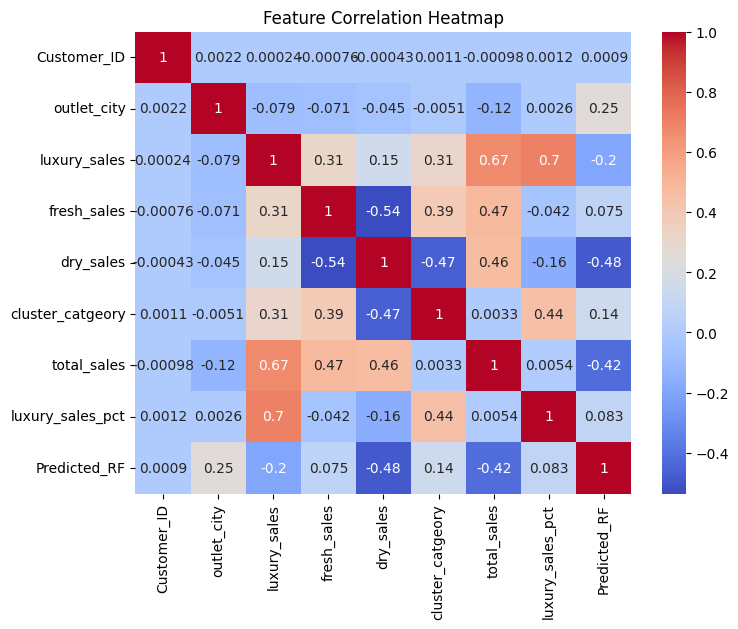

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define features for prediction (using the same features as training)
X = df[['luxury_sales','fresh_sales','dry_sales','outlet_city']] # Re-define X

# Predict using Random Forest with the defined features
df["Predicted_RF"] = rf_model.predict(X)

# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

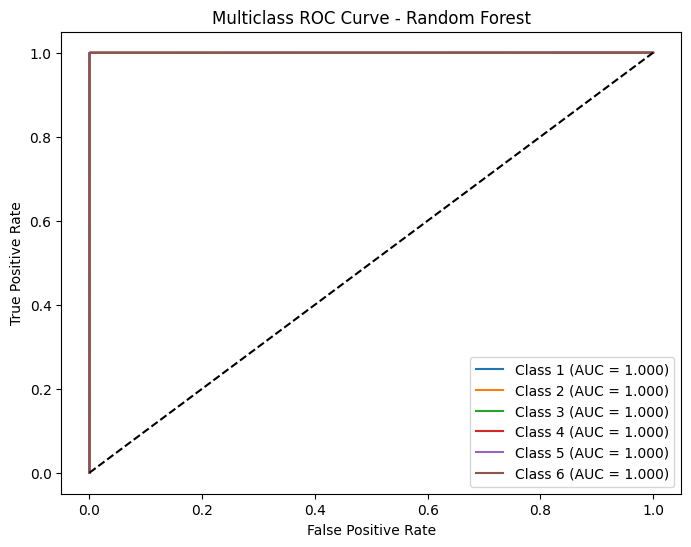

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Convert y_test to a binarized format (One-vs-Rest)
y_test_binarized = label_binarize(y_test, classes=rf_model.classes_)

# Get probability scores for all classes using x_test (your test data)
y_probs = rf_model.predict_proba(x_test)

# Plot ROC Curve for each class
plt.figure(figsize=(8, 6))

for i in range(y_test_binarized.shape[1]):  # Loop through each class
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_probs[:, i])
    auc_score = roc_auc_score(y_test_binarized[:, i], y_probs[:, i])
    plt.plot(fpr, tpr, label=f'Class {rf_model.classes_[i]} (AUC = {auc_score:.3f})')

# Plot settings
plt.plot([0, 1], [0, 1], 'k--')  # Random baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve - Random Forest')
plt.legend()
plt.show()


## **Evaluation**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Adjust hyperparameters
rf_model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
rf_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=50, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report, confusion_matrix

# Predict on training and testing sets
y_train_pred = rf_model.predict(x_train)
y_test_pred = rf_model.predict(x_test)

# Calculate accuracy and MSE for training and testing sets
train_accuracy = float(f"{accuracy_score(y_train, y_train_pred):.3g}")
test_accuracy = float(f"{accuracy_score(y_test, y_test_pred):.3g}")

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Classification Report for training and testing
print("Training Classification Report:")
print(classification_report(y_train, y_train_pred))
print("Testing Classification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix for training and testing
print("Training Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))
print("Testing Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

# Print the results
print(f"Training Accuracy: {train_accuracy:.4f}, Testing Accuracy: {test_accuracy:.4f}")
print(f"Training MSE: {train_mse:.4f}, Testing MSE: {test_mse:.4f}")

# Determine if the model is overfitting or underfitting
if train_accuracy > test_accuracy:
    print("The model is overfitting.")
elif train_accuracy < test_accuracy:
    print("The model is underfitting.")
else:
    print("The model is well-fitted.")

Training Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00    151169
           2       1.00      1.00      1.00    124032
           3       0.95      0.95      0.95     39112
           4       1.00      1.00      1.00    137941
           5       0.93      0.94      0.93     31620
           6       1.00      1.00      1.00    135365

    accuracy                           0.99    619239
   macro avg       0.98      0.98      0.98    619239
weighted avg       0.99      0.99      0.99    619239

Testing Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     37792
           2       1.00      1.00      1.00     31008
           3       0.94      0.94      0.94      9778
           4       1.00      1.00      1.00     34486
           5       0.93      0.92      0.93      7905
           6       1.00      1.00      1.00     33841

    accuracy  